# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", "ils", "bien", "sans", "peut",
       "tous", "après", "ainsi", "donc", "cet", "sous", "celle", "entre", "encore", "toutes", "toute", "pendant", "moins",
       "dire", "cela", "non", "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres", "van", "het",
       "autre", "jusqu", "ville", "rossel", "dem", "à", "alors", "bon", "auquel", "aucun", "avec", "ça", "car", "ceux", 
       "certes", "ci", "etant", "façon", "hein", "hélas", "fois", "hors", "juste", "mais", "malgré", "néanmoins", "peu",
       "on", "où", "ouf", "allo", "oust", "outre", "oh", "pff", "plein", "pif", "plouf", "quelque", "sans", "sapristi", 
       "rien", "sa", "seulement", "si", "sur", "voici", "tél", "telle", "très", "toujours", "tenant", "tandis", "tac", 
       "toc", "toi", "vif", "prés", "fort", "celui", "conf", "jamais", "bonjour", "ans", "nouvelle", "villa", "etc",
       "gar", "partie", "celui", "bat", "déjà", "plusieurs", "mod", "lux", "dès", "mal", "marché", "quelques", "fin",
       "culs", "match", "jour", "petit", "homme", "femme", 'jour', "ordre", "fille", "trav", "bonne", "enfin", "début",
       "âge", "faç", "appart", "vis", "mise", "main", "app", "prix", "point", "réf", "chez", "rue", "avant", "hui", "hui",
       "soir", "belle", "midi", "maison", "personne", "effet", "côté", 'effet', "tête", "matin", "vie", 'mille', "millions",
       "égalemet", "dernier", "puis", "trop", "cas", "avril", "assez", "public", "vie", "mort", "sujet", "heure", "heures",
       "quatre","font", "seul", "près", "souvent", "hier", "service", "mme", "mr", "oui", "non", "monde", "part", "dernière",
       "petite", "ensuite", "ici", "vient", "donner", "lundi", "mardi", "mercreid", "jeudi", "vendredi", "samedi", "dimanche",
       "chambre", "quand", "quant", "nom", "nouveau", "fit", "cours", "mêmes", "ouvriers", "vue", "vers", "corps", "prendre", 
       "porte", "aujourd", "gens", "première", "cent", "terre", "janvier", "séance", "certains", "vente", "succès", "comment", 
       "coup", "mot", "beau", "quo", "prochain", "suite", "eau", "pourquoi", "anvers", "chef", "mieux", "reste", "nord", "sud",
       "bureau", "but", "voir", "art", "certain", "dix", "pourrait", "temps", "angleterre", "londre", "moment", "trouve", "chose",
       "elles", "nombre", "question", "laquelle", "nouvelles", "leurs", "jours", "francs", "jeune", "guerre", "peuple", "amis", "août",
       "prince", "pierre", "année", "donne", "jeunes", "février", "choses", "raison", "tant", "intérêt", "cœur", "œuvre", "jean", 
       "saint", "divers", "moyen", "autant", "conditions", "décembre", "force", "grands", "publique", "centimes", "monsieur", 
       "madame", "sens", "général", "rendre", "aucune", "amour", "peuvent", "lieu", "raison", "faits", "abord", "veut", "sait", "cause",
       "air", "ailleurs", "également", "mars", "ancien", "beaucoup", "longtemps", "six", "semble", "classe", "metttre", "mis", "yeux",
       "celles", "livre", ", cependant", "bas", "questions", "donné", "doute", "mois", "actuellement", "cinq", "doivent", "haut", "nuit", 
       "exemple", "possible", "vrai", "faux", "loin", "reçu", "devant", "quelle", "grâce", "savoir", "ment", "mlle", "feu", "mai", "fils",
       "tour", "idée", "novembre", "presque", "adresser", "mesure", "générale", "mettre", "fer", "petits", "membres", "quel", "vieux", "mercredi",
       "lorsqu", "seule", "personnel", "suivant", "septembre", "discussion", "titre", "esprit", "tel", "gand", "grand", "certaines", "avenir", "paul", 
       "parler", "occasion", "personnes", "faite", "partout", "huit", "écrit", "voie", "troupes", "grandes", "juin", "passé", "lea", "décidé", "place",
       "cour", "concours", "lequel", "aller", "palais", "chemins", "chemin", "quoi", "œuvres", "salle", "maintenant", "compte", "dos", "octobre", "nommé",
       "chacun", "uno", "con", "fond", "rendu", "grande", "surtout", "pouvait", "demain", "annonce", "lors", "devait", "port", "parmi", "présence", 
       "agit", "afin", "long", "train", "somme", "nouveaux", "courant", "trouver", "correspondant", "baron", "semaine", "ligne", "haute", "simple"

       ]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux

In [100]:
# Lister les fichiers du corpus
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f))]
txts

['KB_JB1051_1924-01-31_01-00004.txt',
 'KB_JB1051_1924-03-27_01-00004.txt',
 'KB_JB1051_1924-06-05_01-00004.txt',
 'KB_JB1051_1925-03-05_01-00004.txt',
 'KB_JB1051_1925-07-02_01-00004.txt',
 'KB_JB1051_1926-06-11_01-00004.txt',
 'KB_JB1051_1926-07-22_01-00004.txt',
 'KB_JB1051_1927-08-09_01-00004.txt',
 'KB_JB1051_1927-10-12_01-00004.txt',
 'KB_JB1051_1927-12-04_01-00004.txt',
 'KB_JB1051_1927-12-11_01-00004.txt',
 'KB_JB1051_1928-01-15_01-00004.txt',
 'KB_JB1051_1928-02-29_01-00004.txt',
 'KB_JB1051_1928-07-29_01-00004.txt',
 'KB_JB1051_1935-06-15_01-00004.txt',
 'KB_JB1051_1937-11-21_01-00005.txt',
 'KB_JB421_1899-04-07_01-00001.txt',
 'KB_JB421_1901-03-23_01-00001.txt',
 'KB_JB421_1901-03-25_01-00001.txt',
 'KB_JB421_1901-03-27_01-00001.txt',
 'KB_JB421_1901-06-10_01-00001.txt',
 'KB_JB421_1901-11-20_01-00004.txt',
 'KB_JB421_1902-10-01_01-00001.txt',
 'KB_JB421_1902-10-02_01-00001.txt',
 'KB_JB421_1902-10-31_01-00003.txt',
 'KB_JB421_1902-11-30_01-00005.txt',
 'KB_JB421_1902-12-04_

In [101]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [102]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

1000

In [103]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'Il II POUR LA FEMME Conseils aux Mères ACCIDENTS DE GROSSESSE Lcs femrnes, mais plus partiçulière- tncnt les ouvrières, sont menacées- de multiples accidents pendant la grossesse i chutes, efforts, su'

In [104]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
text = 'text'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{text}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [105]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{text}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"Il II POUR LA FEMME Conseils aux Mères ACCIDENTS DE GROSSESSE Lcs femrnes, mais plus partiçulière- tncnt les ouvrières, sont menacées- de multiples accidents pendant la grossesse i chutes, efforts, suivis de. finisses couches; carie des os ct den dents; va- [rices, mauvaise position du fœtus; rétro-' yersion de la matrice?, .etc.,' • Et parmi les plus graves, l'albnminu- *ie, dont la conséquence terrible est l'at- ,toquo d'éclampsie, qwi se produit au ■jnoment de l'aocouchertient, et tue 60 p.©;"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [106]:
def clean_text(text, folder=None):
    if folder is None:
        input_path = f"{text}.txt"
        output_path = f"{text}_clean.txt"
    else:
        input_path = f"{folder}/{text}.txt"
        output_path = f"{folder}/{text}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [107]:
clean_text(text, folder=temp_path)

'Output has been written in ../data/tmp/text_clean.txt!'

In [108]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{text}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'CONSEILS MÈRES ACCIDENTS GROSSESSE LCS FEMRNES PARTIÇULIÈRE TNCNT OUVRIÈRES MENACÉES MULTIPLES ACCIDENTS GROSSESSE CHUTES EFFORTS SUIVIS FINISSES COUCHES CARIE DEN DENTS RICES MAUVAISE POSITION FŒTUS RÉTRO YERSION MATRICE GRAVES ALBNMINU CONSÉQUENCE TERRIBLE TOQUO ÉCLAMPSIE QWI PRODUIT JNOMENT AOCOUCHERTIENT TUE ENFANTS MÈRES FRAPPÉS TRAITEMENT PRÉVENTIF IMPOR TANCE CAPITALE PARER ACCIDENTS ENCEINTE EXAMINER MÉDECIN GROSÇESSE FERA EXAMINER FRÉQUEMMENT URINE CONTIENT ALBUMINE RÉGIME IMMÉDIATEMENT'

## Nuage de mots

### Afficher les termes les plus fréquents


In [109]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('BRUXELLES', 5838), ('FEMMES', 5011), ('GOUVERNEMENT', 3717), ('PAYS', 3695), ('MINISTRE', 3395), ('BELGIQUE', 3201), ('PARIS', 3057), ('DROIT', 3017), ('TRAVAIL', 3013), ('LOI', 2886)]


### Créer, stocker et afficher le nuage de mots

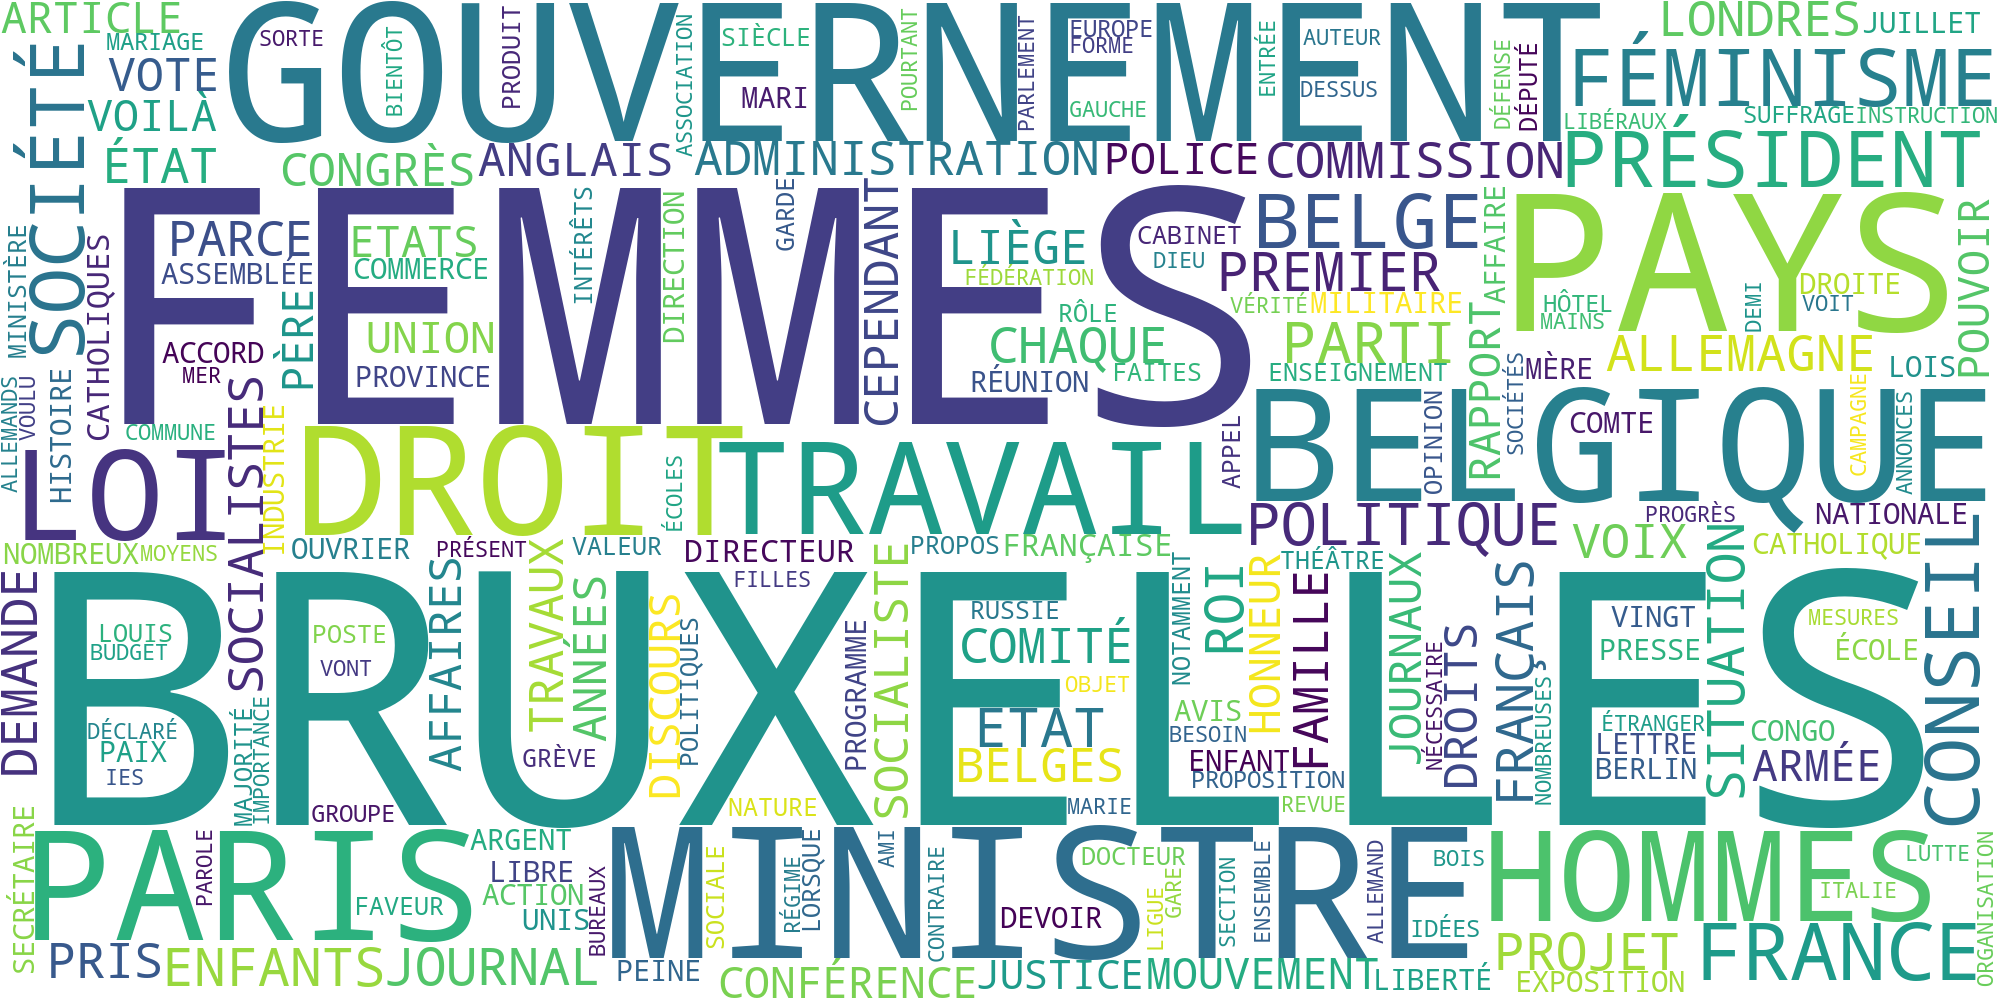

In [110]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{text}.png"))
Image(filename=os.path.join(temp_path, f"{text}.png"))